# Librerias

In [21]:
import importlib
import os, shutil
import numpy as np
import pandas as pd

from tkinter import *
from tkinter.messagebox import askokcancel

from IPython.display import clear_output

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'browser'

import matplotlib.pyplot as plt   # plotting

import rai_exp_2023_sivarita as exp
importlib.reload(exp)

import Sivarita
importlib.reload(Sivarita)

<module 'Sivarita' from 'c:\\repositorios\\rai_exp_2023_sivarita\\Sivarita.py'>

Cargar datos

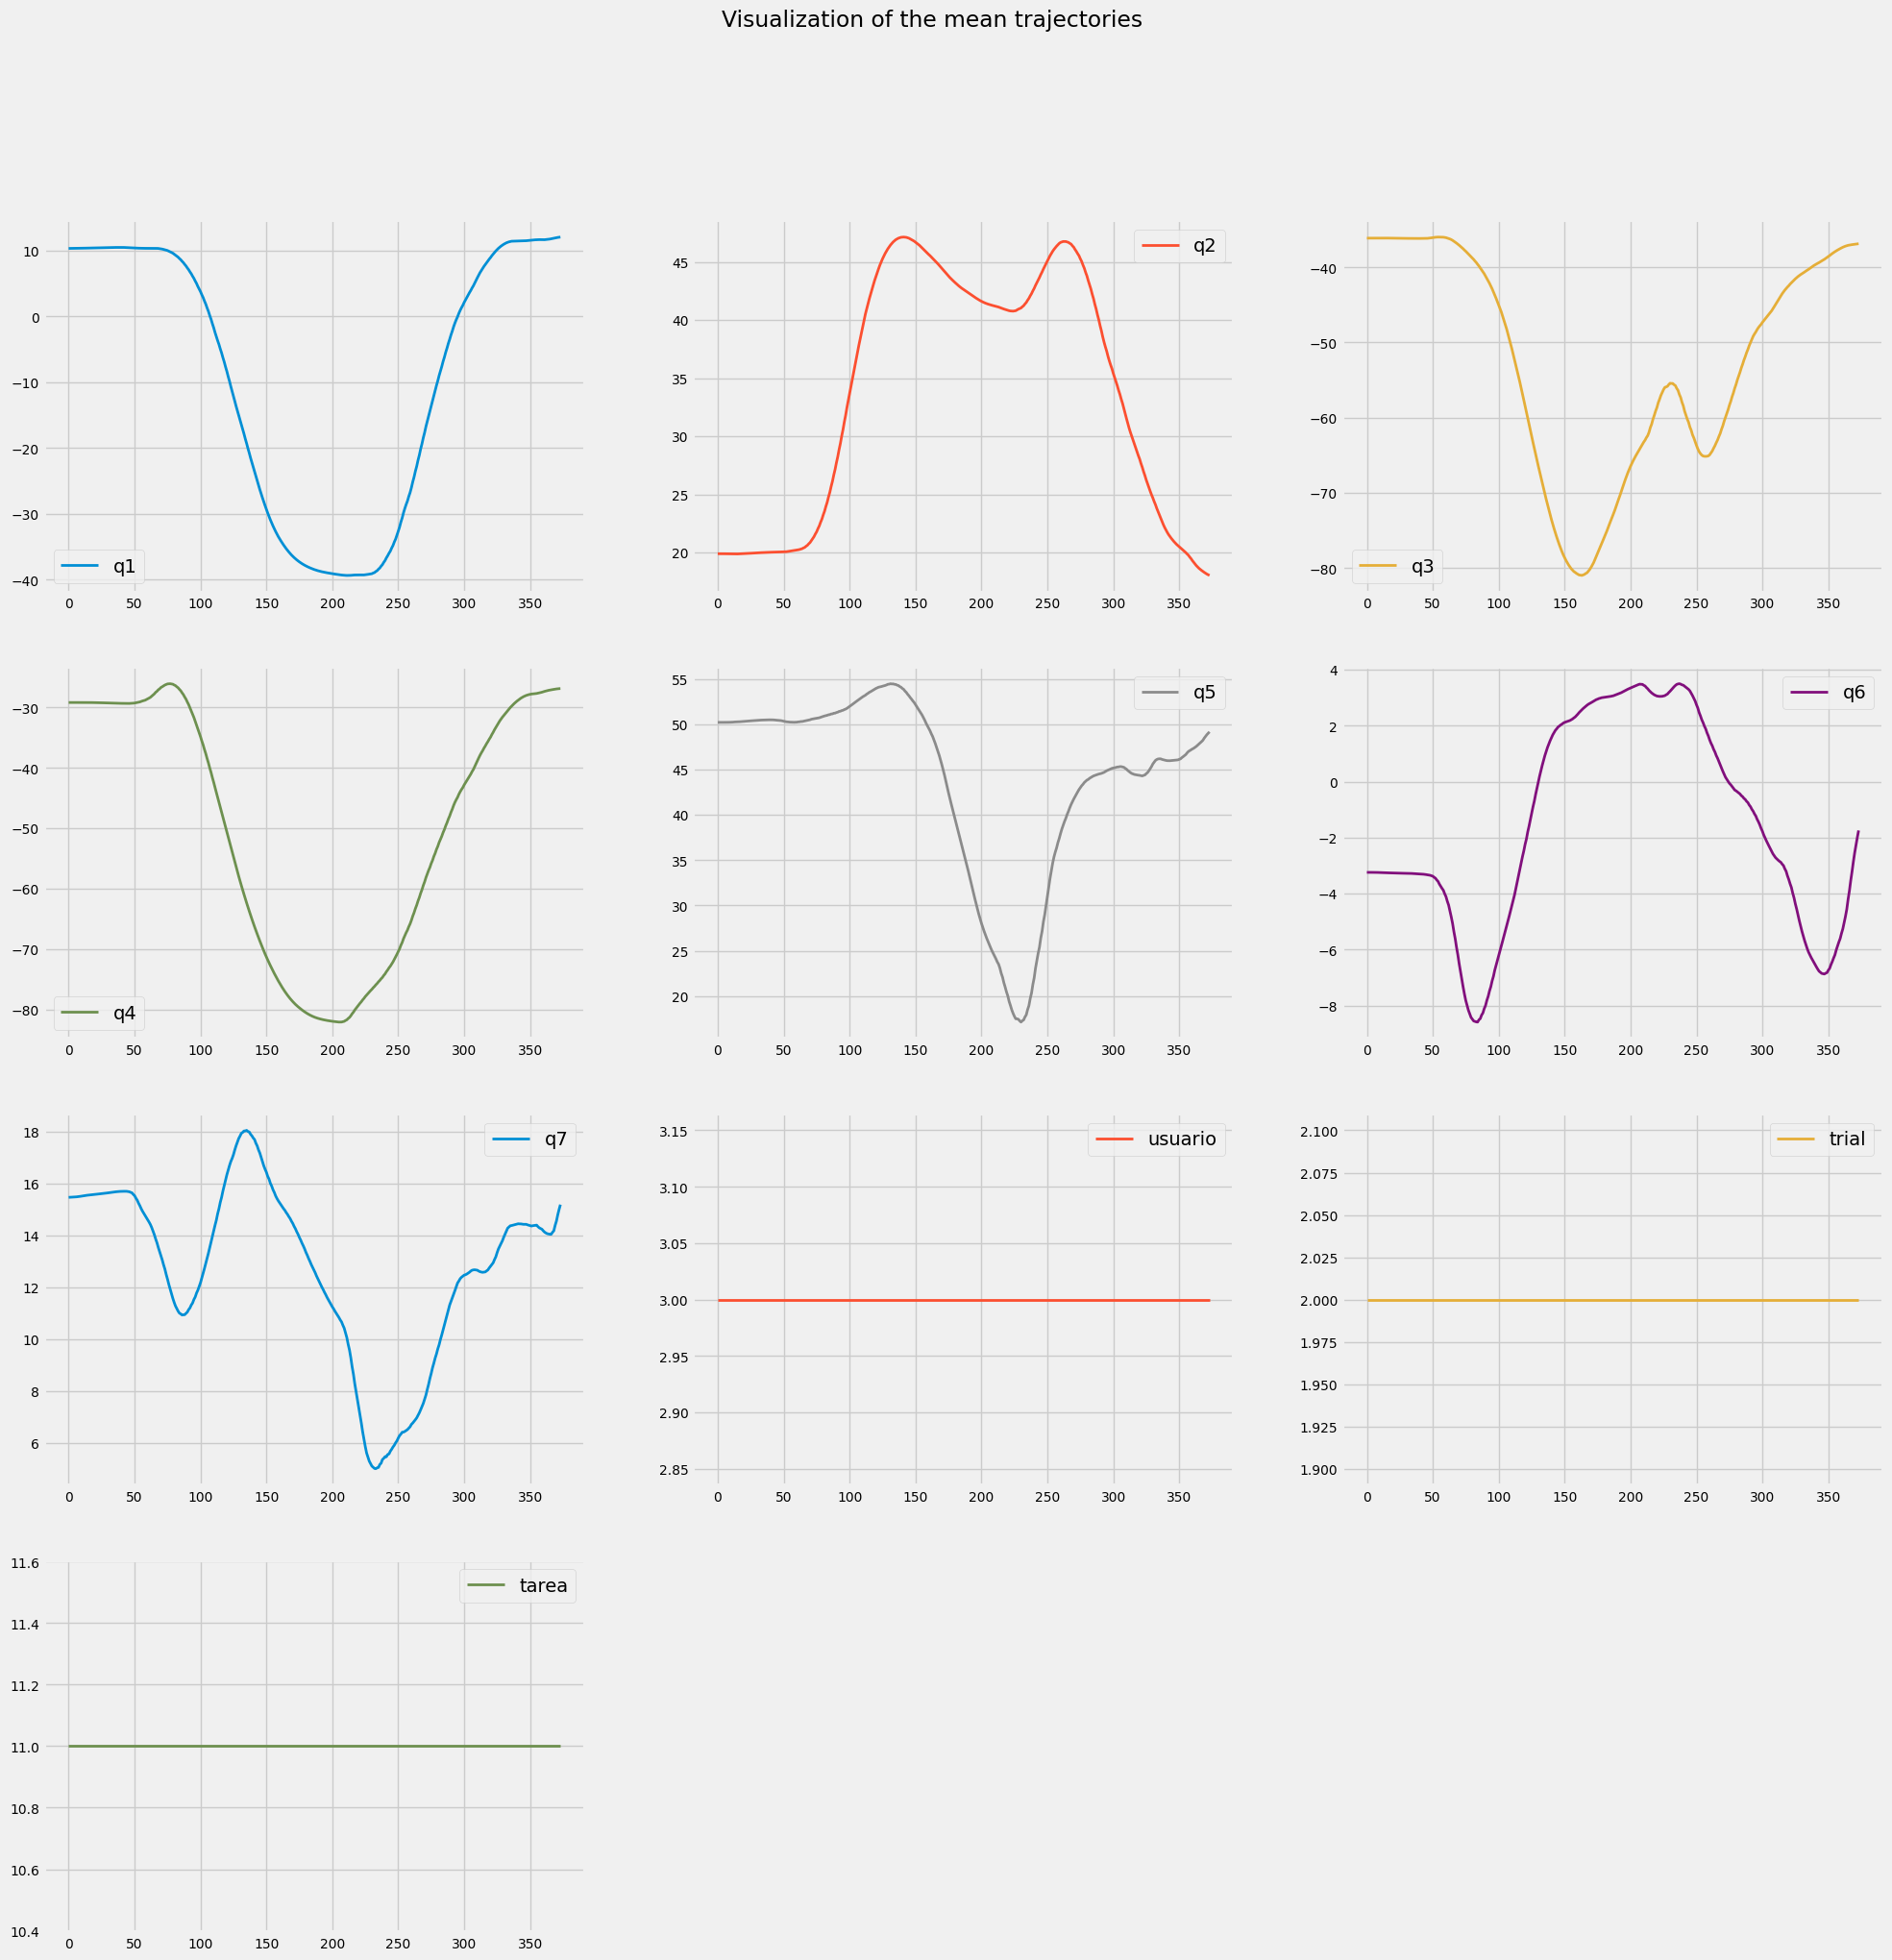

In [13]:
#Datos trayectorias usuarios sanos
df_csv =  pd.read_csv('./tareas/tarea_12.csv')
df_csv = df_csv.drop(columns=['ts'])


df_csv['q1'] = df_csv['q1'].multiply(180 / np.pi)
df_csv['q2'] = df_csv['q2'].multiply(180 / np.pi)
df_csv['q3'] = df_csv['q3'].multiply(180 / np.pi)
df_csv['q4'] = df_csv['q4'].multiply(180 / np.pi)
df_csv['q5'] = df_csv['q5'].multiply(180 / np.pi)
df_csv['q6'] = df_csv['q6'].multiply(180 / np.pi)
df_csv['q7'] = df_csv['q7'].multiply(180 / np.pi)

# Plot the time series
plt.style.use('fivethirtyeight')
df_csv.plot(subplots=True,
        layout=(4, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the mean trajectories')
plt.show()







In [22]:
#Path
path = "./_data_/Usuarios/"

#Cargar datos
df_data = exp.loadData(path)
df_data.sample(5)

,usuario,sesion,actividad,tipo_actividad,upper_size,fore_size,brazo,num_rep,dataFrame,dataFrameIA
23,Ana_Adsuar,2023_4_28_9_15_15,Move_Cube,DESPLAZAR,280.0,250.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
24,Ana_Adsuar,2023_4_28_9_47_29,Move_Cube,DEPOSITAR,280.0,250.0,L,4.0,q1 q2 q3 ...,"Empty DataFrame Columns: [tarea, data_org_1, d..."
3,Alberto_Villegas,2023_3_27_12_43_57,Move_Cube,SORTEAR,290.0,280.0,R,4.0,q1 q2 q3 ...,"Empty DataFrame Columns: [tarea, data_org_1, d..."
138,Carmen_Cerrillo,2023_5_5_11_53_32,MoveGlass,BEBER,290.0,250.0,R,4.0,q1 q2 q3 ...,tarea data_org_1 data_pred_1 data_org_2 ...
285,María _Martinez,2023_3_27_16_16_34,Move_Cube,DESPLAZAR,310.0,250.0,R,4.0,q1 q2 q3 ...,"Empty DataFrame Columns: [tarea, data_org_1, d..."


Procesar parámetros

In [16]:
df_params = exp.process_all_params(df_data)
df_params.sample(5)

,usuario,session,activity,tipo_actividad,brazo,MAX_Q1,MAX_Q2,MAX_Q3,MAX_Q4,MAX_Q5,MAX_Q6,MAX_Q7,MIN_Q1,MIN_Q2,MIN_Q3,MIN_Q4,MIN_Q5,MIN_Q6,MIN_Q7
132,Carmen _Saez,2023_3_23_12_25_20,TouchGame,RODILLA,R,35.884473,45.604862,-22.367197,-17.987730,82.786077,-3.787736,18.593401,9.801378,27.843887,-58.531115,-47.338212,56.943240,-13.512739,-3.049216
35,Ana_Adsuar,2023_4_28_9_25_14,TouchGame,CABEZA,R,130.624181,47.960305,133.657566,60.657546,163.968246,-26.441634,52.836034,39.854495,24.328745,-82.619307,-0.353745,80.580122,-47.231359,-11.644721
208,Isabel_Cuenca,2023_3_23_10_45_42,PaintForms,CÍRCULO,R,52.270398,58.422872,-8.565707,-6.342551,67.809379,-1.121043,3.843022,14.767520,21.664608,-54.191053,-51.867295,52.581284,-18.906706,-13.141476
3,Alberto_Villegas,2023_3_27_12_43_57,Move_Cube,SORTEAR,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alberto_Villegas,2023_3_27_12_42_11,Move_Cube,DEPOSITAR,R,39.149452,76.265638,-21.607361,-9.270139,119.197482,-7.483642,37.625688,-25.379990,39.503227,-89.471854,-52.258200,46.934862,-22.961928,-18.619379


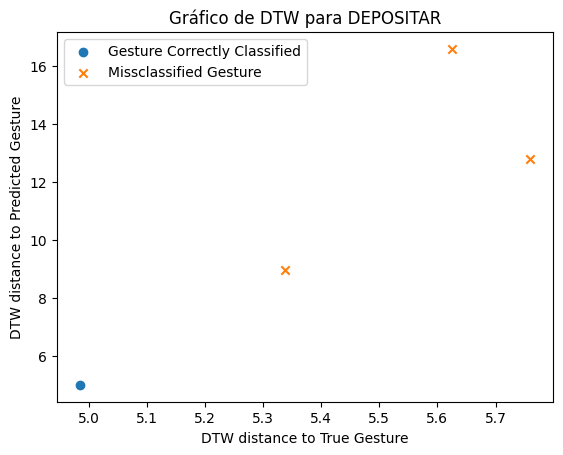

In [14]:
df = df_data.dataFrameIA[25]
tarea = df_data.tipo_actividad[25]
Sivarita.plotDTWparam(df, tarea)
